In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import statsmodels.stats.api as sms
from scipy.stats import (ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu,
                         pearsonr, spearmanr, kendalltau, f_oneway, kruskal)
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.multicomp import MultiComparison


In [4]:
# TODO : Import the Data from the kaggle API
!kaggle datasets download -d sergylog/ab-test-data --unzip

Dataset URL: https://www.kaggle.com/datasets/sergylog/ab-test-data
License(s): Community Data License Agreement - Sharing - Version 1.0




  0%|          | 0.00/28.3k [00:00<?, ?B/s]
100%|██████████| 28.3k/28.3k [00:00<00:00, 860kB/s]


# Data Understanding

In [ ]:
#TODO : compute the following : DataFrame Information, Columns in DataFrame, Counting Missing Values, Descriptive Statistics, Value Counts for VARIANT_NAME, Counting Unique Users in USER_ID

In [9]:
df = pd.read_csv('AB_Test_Results.csv')
df.info(), df.describe(), df.isna().sum(), df['VARIANT_NAME'].value_counts(), df['USER_ID'].nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


(None,
             USER_ID       REVENUE
 count  10000.000000  10000.000000
 mean    4981.080200      0.099447
 std     2890.590115      2.318529
 min        2.000000      0.000000
 25%     2468.750000      0.000000
 50%     4962.000000      0.000000
 75%     7511.500000      0.000000
 max    10000.000000    196.010000,
 USER_ID         0
 VARIANT_NAME    0
 REVENUE         0
 dtype: int64,
 VARIANT_NAME
 variant    5016
 control    4984
 Name: count, dtype: int64,
 6324)

# Average Revenue by VARIANT_NAME

In [10]:
#TODO
df.groupby('VARIANT_NAME').mean()

,USER_ID,REVENUE
VARIANT_NAME,,
control,4989.436798,0.129013
variant,4972.776914,0.070070


What if H0: M1 = M2 ?
What about H1: M1 1= M2 ?

# Assumptions Control:
*# 1- Normality Assumptions*
*# 2- Homogeneity of Variances Assumption*

**Null Hypothesis (H₀):** The data follows a normal distribution.

**Alternative Hypothesis (H₁):** The data does not follow a normal distribution.

In [11]:
# TODO : test the normality of revenue data in two groups (variant and control) within your DataFrame df using the Shapiro-Wilk test, what can you conclude ?

shapiro(df[df['VARIANT_NAME'] == 'control']['REVENUE']), shapiro(df[df['VARIANT_NAME'] == 'variant']['REVENUE'])

c:\Users\d1411\anaconda3\envs\JUPYTER_DEFAULT\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5016.
  res = hypotest_fun_out(*samples, **kwds)


(ShapiroResult(statistic=0.01833147442513483, pvalue=2.4983285100057203e-95),
 ShapiroResult(statistic=0.027033073451830147, pvalue=2.7310104028899288e-95))

Both p-values are extremely small, we reject null hypothesis.

**The null hypothesis (H₀)** for Levene's test is that all groups have equal variances (homoscedasticity).

**The alternative hypothesis (H₁)** is that at least one group has a different variance (heteroscedasticity).

In [12]:
# TODO : test for the homogeneity of variances between two groups (variant and control) within your DataFrame df using the Levene's test,  what can you conclude ?

levene(df[df['VARIANT_NAME'] == 'control']['REVENUE'], df[df['VARIANT_NAME'] == 'variant']['REVENUE'])

LeveneResult(statistic=1.6158565214488871, pvalue=0.2037000785338918)

P-value is bigger than 0.05. We fail to reject the null hypothesis.

# Non-Parametric Test (mannwhitneyu Test)

**Null Hypothesis (H₀):** the distributions of the two groups are identical.

**Alternative Hypothesis (H₁):** the distributions of the two groups are not the same.

In [13]:
# TODO : perform the Mann-Whitney U test for comparing the average revenue between the variant and control groups in your DataFrame, what can you conclude ?
mannwhitneyu(df[df['VARIANT_NAME'] == 'control']['REVENUE'], df[df['VARIANT_NAME'] == 'variant']['REVENUE'])

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)

P-value is larger than 0.05. We fail to reject the null hypothesis.

<Axes: xlabel='VARIANT_NAME', ylabel='REVENUE'>

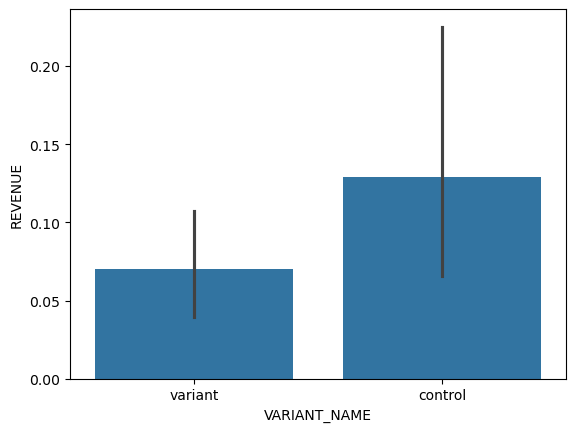

In [14]:
# TODO : create a bar plot showing the average revenues by variant names using the seaborn library
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=df)